In [1]:
import pandas as pd

In [3]:
Point2_data_without_NaSqft=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_without_NaSqft.csv')

In [3]:
Point2_data_without_NaSqft.head()

Beds  Bath    Sqft     Price                   Address Province  \
0   3.0   1.0  1630.0  225000.0         1368 Forties Rd.        NS   
1   2.0   1.0   944.0  174500.0        111 Lakeshore Dr.        NS   
2   4.0   2.0  4000.0  599000.0               1734 HWY 1        NS   
3   5.0   2.0  2721.0  690000.0       2591 Clarence Road        NS   
4  15.0   6.0  6630.0  495000.0  4616 Highway 1 Weymouth        NS   

            Region  
0  Atlantic region  
1  Atlantic region  
2  Atlantic region  
3  Atlantic region  
4  Atlantic region

In [5]:
Point2_data_without_NaSqft.tail()

Beds  Bath    Sqft       Price                Address Province  \
36709   5.0   3.0  3700.0  11000000.0       4664 192 STREET        BC   
36710   4.0   3.0  3335.0   5550000.0     595 W 28TH AVENUE        BC   
36711   4.0   3.0  2511.0   3024120.0    540 POIRIER STREET        BC   
36712   4.0   4.0  4753.0   5180000.0      20395 74B AVENUE        BC   
36713   5.0   8.0  6802.0   5999000.0  1507 PINECREST DRIVE        BC   

           Region  
36709  West Coast  
36710  West Coast  
36711  West Coast  
36712  West Coast  
36713  West Coast

In [6]:
Point2_data_without_NaSqft.shape

(36714, 7)

### 1. Prepare location information

In [44]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim(user_agent="jupyter lab")
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)

Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States


In [8]:
len(Point2_data_without_NaSqft)

36714

In [57]:
Point2_data_without_NaSqft.loc[:,'Address'] = Point2_data_without_NaSqft.loc[:,'Address'].str.lower()

In [58]:
Point2_data_without_NaSqft['Location'] = Point2_data_without_NaSqft['Address']+Point2_data_without_NaSqft['Province']

In [61]:
Point2_data_without_NaSqft.tail()

Beds  Bath    Sqft       Price                Address Province  \
36709   5.0   3.0  3700.0  11000000.0       4664 192 street        BC   
36710   4.0   3.0  3335.0   5550000.0     595 w 28th avenue        BC   
36711   4.0   3.0  2511.0   3024120.0    540 poirier street        BC   
36712   4.0   4.0  4753.0   5180000.0      20395 74b avenue        BC   
36713   5.0   8.0  6802.0   5999000.0  1507 pinecrest drive        BC   

           Region                 Location  
36709  West Coast       4664 192 street BC  
36710  West Coast     595 w 28th avenue BC  
36711  West Coast    540 poirier street BC  
36712  West Coast      20395 74b avenue BC  
36713  West Coast  1507 pinecrest drive BC

### 2. Add 'Latitude' Column, 'Longitude' Column, and Location Column

In [50]:
from geopy.exc import GeocoderTimedOut

In [73]:
coordinates = []
for i in range(len(Point2_data_without_NaSqft)):
    try:
        location = geolocator.geocode(Point2_data_without_NaSqft['Location'][i],timeout=10000)
        coordinates.append((location.latitude, location.longitude,location.address )) 
    except (GeocoderTimedOut):
        coordinates.append(('NaN','NaN'))
    except(AttributeError):
        coordinates.append(('NaN','NaN'))
    pass
    if (i % 1000 == 0 ):
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000


In [74]:
len(coordinates)

36714

In [129]:
Latitude = []
Longitude = []
Location = []
for i in range(len(Point2_data_without_NaSqft)):
    Latitude.append(coordinates[i][0])
    Longitude.append(coordinates[i][1])
    if (len(coordinates[i])== 2):
        Location.append('NaN')
    else:
        Location.append(coordinates[i][2])

In [84]:
Point2_data_without_NaSqft_Google = Point2_data_without_NaSqft

In [134]:
Point2_data_without_NaSqft_Google['Latitude'] = Latitude
Point2_data_without_NaSqft_Google['Longitude'] = Longitude
Point2_data_without_NaSqft_Google['Location'] = Location

In [137]:
Point2_data_without_NaSqft_Google.tail()

Beds  Bath    Sqft       Price                Address Province  \
36709   5.0   3.0  3700.0  11000000.0       4664 192 street        BC   
36710   4.0   3.0  3335.0   5550000.0     595 w 28th avenue        BC   
36711   4.0   3.0  2511.0   3024120.0    540 poirier street        BC   
36712   4.0   4.0  4753.0   5180000.0      20395 74b avenue        BC   
36713   5.0   8.0  6802.0   5999000.0  1507 pinecrest drive        BC   

           Region   Latitude   Longitude  \
36709  West Coast   49.08717 -122.690572   
36710  West Coast   49.24629  -123.12627   
36711  West Coast  49.254926 -122.846463   
36712  West Coast  49.138314 -122.649719   
36713  West Coast  49.352442 -123.159187   

                                                Location  
36709  4664, 192 Street, Cloverdale, Surrey, Metro Va...  
36710  West 28th Avenue, South Cambie, Vancouver, Dis...  
36711  Poirier Street, Austin Heights, Coquitlam, Met...  
36712  74B Avenue, Langley Township, Township of Lang...  
36713  Pinecrest Drive, British Properties, West Vanc...

In [151]:
Point2_data_without_NaSqft_Google.loc[:, ['Latitude', 'Longitude']] = Point2_data_without_NaSqft_Google.loc[:, ['Latitude', 'Longitude']].astype(float)

In [203]:
Point2_data_without_NaSqft_Google.dtypes

Beds         float64
Bath         float64
Sqft         float64
Price        float64
Address       object
Province      object
Region        object
Latitude     float64
Longitude    float64
Location      object
dtype: object

### 3. Store new dataframe in the folder.

In [2]:
#Read
Point2_data_without_NaSqft_Google=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_without_NaSqft_Google.csv')
#Save
#Point2_data_without_NaSqft_Google.to_csv('Point2_data_without_NaSqft_Google.csv',index=False)

### 4. Store data with NaN values.

In [3]:
Point2_data_without_NaSqft_Google.isnull().sum()

Beds            0
Bath            0
Sqft            0
Price           0
Address         0
Province        0
Region          0
Latitude     5663
Longitude    5663
Location     5663
dtype: int64

In [4]:
Point2_data_without_NaSqft_Google_NA = Point2_data_without_NaSqft_Google[Point2_data_without_NaSqft_Google.isna().any(axis=1)]

In [5]:
Point2_data_without_NaSqft_Google_NA.tail()

Beds  Bath     Sqft       Price  \
36653   6.0   7.0   3388.0   3999900.0   
36655   6.0   4.0   2700.0   5000000.0   
36670   5.0   4.0   4149.0   4399000.0   
36679  11.0   8.0  12955.0  28800000.0   
36700   5.0   6.0   5987.0  18750000.0   

                                              Address Province      Region  \
36653                          2956 waterloo street 1       BC  West Coast   
36655  #12051 + 11951 okanagan centre road, w 12051 +       BC  West Coast   
36670                          9990 eastside road, 13       BC  West Coast   
36679                              1 fawn bluff cove        BC  West Coast   
36700                              1277&1281 lynn rd        BC  West Coast   

       Latitude  Longitude Location  
36653       NaN        NaN      NaN  
36655       NaN        NaN      NaN  
36670       NaN        NaN      NaN  
36679       NaN        NaN      NaN  
36700       NaN        NaN      NaN

In [6]:
Point2_data_without_NaSqft_Google_NA.shape

(5663, 10)

In [7]:
Point2_data_without_NaSqft_Google_NA['Province'].value_counts()

AB    2607
BC     842
SK     808
NL     278
QC     268
NS     261
MB     228
NB     182
ON     117
PE      72
Name: Province, dtype: int64

In [8]:
#Read
Point2_data_without_NaSqft_Google_NA=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_without_NaSqft_Google_NA.csv')
#Save
#Point2_data_without_NaSqft_Google_NA.to_csv('Point2_data_without_NaSqft_Google_NA.csv',index=False)

Those address needs to be update correctly.

### 5. Verify coordinates

In [9]:
Point2_data_NoneNas = Point2_data_without_NaSqft_Google.dropna()

In [10]:
Point2_data_NoneNas.shape

(31051, 10)

In [6]:
Point2_data_NoneNas['Province'].value_counts()

AB    10126
BC     7276
SK     4731
NL     2146
NS     1744
ON     1373
NB     1210
MB     1181
QC      853
PE      411
Name: Province, dtype: int64

In [11]:
NS_data = Point2_data_NoneNas[Point2_data_NoneNas['Province']=='NS']

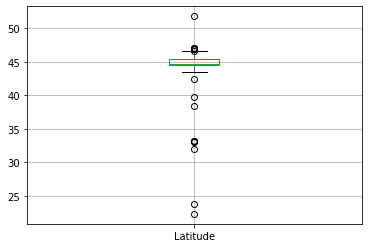

In [12]:
boxplot = NS_data.boxplot(column=['Latitude'])

In [13]:
a = NS_data[NS_data['Latitude']>=float(47)]
b = NS_data[NS_data['Latitude']<=float(43)]

In [14]:
c = NS_data.loc[a.index.union(b.index), :]

**Let's take a look on the map**

In [15]:
import folium

In [16]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c['Latitude'], c['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

Drop outliers

In [17]:
New_NSdata = NS_data.drop(c.index)

In [18]:
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(New_NSdata['Latitude'], New_NSdata['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

#### Store outliner data and correct data

In [19]:
Point2_data_incorrect_coordinates = c

In [18]:
#Read
Point2_data_incorrect_coordinates=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_incorrect_coordinates.csv')
#Save
#Point2_data_incorrect_coordinates.to_csv('Point2_data_incorrect_coordinates.csv',index=False)

## PE

In [20]:
PE_data = Point2_data_NoneNas[Point2_data_NoneNas['Province']=='PE']

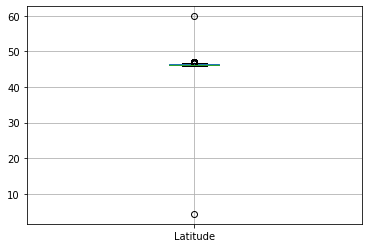

In [21]:
boxplot = PE_data.boxplot(column=['Latitude'])

In [22]:
a = PE_data[PE_data['Latitude']>=float(50)]
b = PE_data[PE_data['Latitude']<=float(40)]

In [23]:
c = PE_data.loc[a.index.union(b.index), :]

In [23]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c['Latitude'], c['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

Drop outliners

In [24]:
New_PEdata = PE_data.drop(c.index)

In [25]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              

labels = list(New_PEdata['Sqft'])

for lat, lng, label in zip(New_PEdata['Latitude'], New_PEdata['Longitude'], labels):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        popup=str(label),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
    
Canada_map

In [26]:
New_PEdata[New_PEdata['Sqft']==1946]

Beds  Bath    Sqft     Price                     Address Province  \
2444   4.0   2.0  1946.0  299900.0  3265 trans canada highway        PE   

               Region  Latitude  Longitude  \
2444  Atlantic region  46.19119 -63.777676   

                                               Location  
2444  Confederation Bridge, Botsford Parish, Prince ...

This data is on the bridge, so it is not relistic.

#### Store outliner data and correct data

In [27]:
c = PE_data.loc[a.index.union(b.index), :]
frames = [New_PEdata[New_PEdata['Sqft']==1946], c]
c = pd.concat(frames)

In [497]:
#Read
#Point2_data_incorrect_coordinates=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_incorrect_coordinates.csv')

In [498]:
frames = [Point2_data_incorrect_coordinates, c]
Point2_data_incorrect_coordinates = pd.concat(frames)
Point2_data_incorrect_coordinates.shape

(16, 10)

In [500]:
#Read
Point2_data_incorrect_coordinates=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_incorrect_coordinates.csv')
#Save
#Point2_data_incorrect_coordinates.to_csv('Point2_data_incorrect_coordinates.csv',index=False)

Drop the outliner

In [28]:
New_PEdata = New_PEdata.drop([2282])

## NB

In [29]:
NB_data = Point2_data_NoneNas[Point2_data_NoneNas['Province']=='NB']

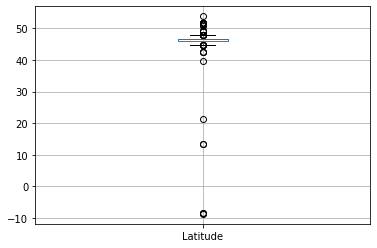

In [30]:
boxplot = NB_data.boxplot(column=['Latitude'])

In [31]:
c = NB_data[NB_data['Latitude']<=float(30)]

In [32]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c['Latitude'], c['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

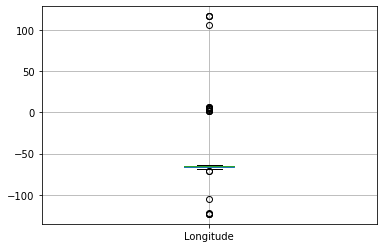

In [32]:
boxplot = NB_data.boxplot(column=['Longitude'])

In [33]:
a = NB_data[NB_data['Longitude']>=float(-50)]
b = NB_data[NB_data['Longitude']<=float(-100)]

In [34]:
c2 = NB_data.loc[a.index.union(b.index), :]

In [36]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c2['Latitude'], c2['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

Let's combine two groups of outliners together

In [35]:
c = NB_data[NB_data['Latitude']<=float(30)]
c2 = NB_data.loc[a.index.union(b.index), :]
frames = [c, c2]
c = pd.concat(frames)

In [38]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c['Latitude'], c['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

Map the data

In [36]:
NB_data = Point2_data_NoneNas[Point2_data_NoneNas['Province']=='NB']
New_NBdata = NB_data.drop(c.index)

In [37]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              

labels = list(New_NBdata['Sqft'])

for lat, lng, label in zip(New_NBdata['Latitude'], New_NBdata['Longitude'], labels):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        popup=str(label),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
    
Canada_map

There is one outlier which the Sqft=2124

In [55]:

New_NBdata[New_NBdata['Address'].str.contains("958 route 495")]

Beds  Bath    Sqft    Price         Address Province           Region  \
3517   3.0   1.0  1176.0  75000.0  958 route 495        NB  Atlantic region   

       Latitude  Longitude                                           Location  
3517  42.607214 -71.324318  Interstate 495 Nb Cd Road, Lowell, Middlesex C...

In [56]:
c = NB_data[NB_data['Latitude']<=float(30)]
c2 = NB_data.loc[a.index.union(b.index), :]
frames = [New_NBdata[New_NBdata['Address'].str.contains("958 route 495")], c,c2]
c = pd.concat(frames)
c.shape

(83, 10)

In [57]:
NB_data=NB_data.drop([3517])

In [58]:
#Read
Point2_data_incorrect_coordinates=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_incorrect_coordinates.csv')

In [59]:
frames = [Point2_data_incorrect_coordinates, c]
Point2_data_incorrect_coordinates = pd.concat(frames)
Point2_data_incorrect_coordinates.shape

(3351, 10)

In [549]:
#Read
Point2_data_incorrect_coordinates=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_incorrect_coordinates.csv')
#Save
#Point2_data_incorrect_coordinates.to_csv('Point2_data_incorrect_coordinates.csv',index=False)
Point2_data_incorrect_coordinates.shape

(99, 10)

Drop the outliner

In [43]:
NB_data = NB_data.drop([3502])

## NL

In [44]:
NL_data = Point2_data_NoneNas[Point2_data_NoneNas['Province']=='NL']

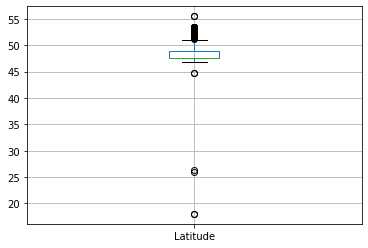

In [45]:
boxplot = NL_data.boxplot(column=['Latitude'])

In [46]:
a1 = NL_data[NL_data['Latitude']>=float(60)]
b1 = NL_data[NL_data['Latitude']<=float(40)]
c1 = NL_data.loc[a1.index.union(b1.index), :]

In [47]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c1['Latitude'], c1['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

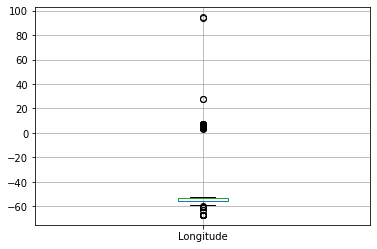

In [48]:
boxplot = NL_data.boxplot(column=['Longitude'])

In [49]:
a2 = NL_data[NL_data['Longitude']>=float(0)]
b2 = NL_data[NL_data['Longitude']<=float(-100)]
c2 = NL_data.loc[a2.index.union(b2.index), :]

In [50]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c2['Latitude'], c2['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

Let's combine two groups of outliners together

In [51]:
c1 = NL_data.loc[a1.index.union(b1.index), :]
c2 = NL_data.loc[a2.index.union(b2.index), :]
frames = [c1, c2]
c = pd.concat(frames)

In [52]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              
    
for lat, lng in zip(c['Latitude'], c['Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
Canada_map

Map the data

In [53]:
NL_data = Point2_data_NoneNas[Point2_data_NoneNas['Province']=='NL']
New_NLdata = NL_data.drop(c.index)

In [54]:
# Create map and display it
Canada_map = folium.Map(location=[56.1304, -92.3468], zoom_start=4)              

labels = list(New_NLdata['Sqft'])

for lat, lng, label in zip(New_NLdata['Latitude'], New_NLdata['Longitude'], labels):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        fill=False,
        popup=str(label),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Canada_map)
    
Canada_map

In [55]:
c.shape

(76, 10)

In [574]:
frames = [Point2_data_incorrect_coordinates, c]
Point2_data_incorrect_coordinates = pd.concat(frames)
Point2_data_incorrect_coordinates.shape

(175, 10)

In [575]:
Point2_data_incorrect_coordinates.to_csv('Point2_data_incorrect_coordinates.csv',index=False)

In [576]:
#Read
Point2_data_incorrect_coordinates=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_incorrect_coordinates.csv')
#Save
#Point2_data_incorrect_coordinates.to_csv('Point2_data_incorrect_coordinates.csv',index=False)
Point2_data_incorrect_coordinates.shape

(175, 10)

In [57]:
frames = [New_NSdata, New_PEdata, New_NBdata, New_NLdata]
Point2_data_Canada_No_NaN1= pd.concat(frames)
Point2_data_Canada_No_NaN1.shape

(5345, 10)

In [58]:
Point2_data_Canada_No_NaN1.to_csv('Point2_data_Canada_No_NaN1.csv',index=False)